# Implementación de k-Nearest Neighbors (kNN)
##Vinculo al Colab: https://colab.research.google.com/drive/1eCfCltZ1meaSzlTXgqHqTIc5DNVIqSAb?usp=sharing
## 1.1 Fundamentos de la técnica

k-Nearest Neighbors (kNN) es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Su principio fundamental es:

- **Aprendizaje basado en instancias**: No construye un modelo explícito, sino que almacena todas las instancias de entrenamiento.
- **Clasificación por proximidad**: Para clasificar una nueva instancia, busca las k instancias más cercanas en el espacio de características.
- **Votación por mayoría**: La clase más frecuente entre los k vecinos se asigna a la nueva instancia.

**Ventajas**:
- Simple de entender e implementar
- No asume distribución específica de los datos
- Funciona bien con datos no lineales

**Desventajas**:
- Computacionalmente costoso con datasets grandes
- Sensible a la escala de las características
- Requiere selección adecuada de k

## 1.2 Modelo Matemático

### Distancia Euclidiana
La métrica más común para calcular la proximidad entre dos puntos $x_i$ y $x_j$ es:

$$d(x_i, x_j) = \sqrt{\sum_{k=1}^{n}(x_{ik} - x_{jk})^2}$$

### Algoritmo de Clasificación
1. Calcular distancias entre el punto de prueba y todos los puntos de entrenamiento
2. Seleccionar los k puntos más cercanos
3. Asignar la clase por votación mayoritaria:

$$\hat{y} = \text{argmax}_{c} \sum_{i=1}^{k} I(y_i = c)$$

donde $I()$ es la función indicadora que vale 1 si la condición es verdadera, 0 en caso contrario.

## 1.3 Librerías y Funciones

## Descripción de Funciones de Librerías Externas

### **numpy**
- `np.array()`: Convierte datos a arrays multidimensionales para operaciones numéricas eficientes
- `np.unique()`: Encuentra elementos únicos en un array
- `np.argmax()`: Devuelve el índice del valor máximo en un array
- `np.arange()`: Crea arrays con valores espaciados regularmente

### **pandas**
- `pd.DataFrame()`: Crea una estructura de datos tabular (dataframe) para manipulación de datos
- `df.describe()`: Genera estadísticas descriptivas (media, std, min, max, percentiles)
- `df.value_counts()`: Cuenta la frecuencia de valores únicos en una columna

### **matplotlib.pyplot**
- `plt.subplots()`: Crea una figura y un conjunto de subplots
- `plt.figure()`: Crea una nueva figura para visualización
- `plt.xlabel()/ylabel()`: Establece etiquetas para los ejes
- `plt.title()`: Agrega título al gráfico
- `plt.show()`: Muestra todos los gráficos abiertos

### **seaborn**
- `sns.heatmap()`: Crea mapas de calor para visualizar matrices de datos
- `sns.set_palette()`: Define la paleta de colores para los gráficos
- `sns.scatterplot()`: Crea gráficos de dispersión con estética mejorada

### **scikit-learn**
- `load_iris()`: Carga el dataset Iris de flores (clásico para clasificación)
- `train_test_split()`: Divide datos en conjuntos de entrenamiento y prueba
- `StandardScaler()`: Estandariza características (media=0, std=1)
- `KNeighborsClassifier()`: Implementa el algoritmo k-Nearest Neighbors para clasificación
- `confusion_matrix()`: Calcula matriz de confusión para evaluar accuracy
- `accuracy_score()`: Calcula el porcentaje de predicciones correctas
- `classification_report()`: Genera reporte con métricas de clasificación

### **scikit-learn (métodos de modelos)**
- `.fit()`: Entrena el modelo con datos de entrenamiento
- `.predict()`: Realiza predicciones con el modelo entrenado
- `.predict_proba()`: Devuelve probabilidades de predicción
- `.score()`: Calcula el accuracy del modelo
- `.kneighbors()`: Encuentra los k vecinos más cercanos a un punto

### **warnings**
- `warnings.filterwarnings()`: Controla el comportamiento de los mensajes de advertencia
# **Implementación del modelo en código.**

In [3]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# **1.4 Pipeline de Machine Learning**
## **1.4.1 Preprocesamiento y análisis exploratorio.**

In [4]:
# Carga del dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Crear DataFrame para mejor visualización
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones: {X.shape}")
print(f"Características: {feature_names}")
print(f"Clases: {target_names}")

=== INFORMACIÓN DEL DATASET ===
Dimensiones: (150, 4)
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']


In [5]:
# Análisis estadístico descriptivo
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())


=== ESTADÍSTICAS DESCRIPTIVAS ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
# Información por clase
print("\n=== DISTRIBUCIÓN POR CLASE ===")
print(df['species'].value_counts())


=== DISTRIBUCIÓN POR CLASE ===
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


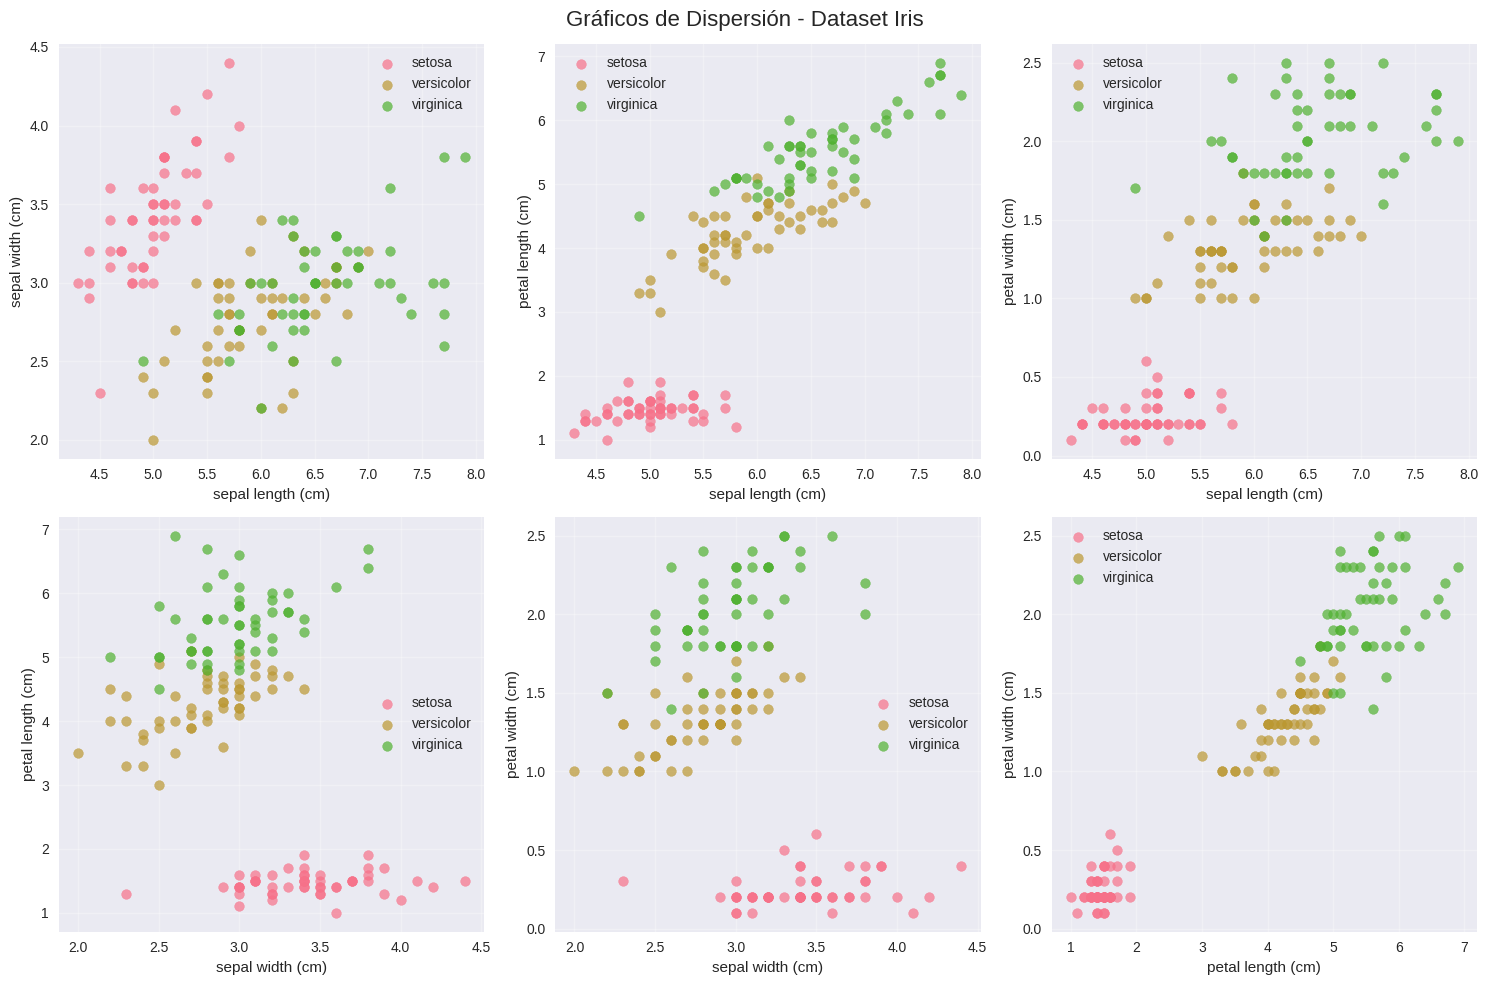

In [7]:
# Gráficos de dispersión (Scatter Plots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Gráficos de Dispersión - Dataset Iris', fontsize=16)

# Combinaciones de características para scatter plots
feature_combinations = [
    (0, 1), (0, 2), (0, 3),
    (1, 2), (1, 3), (2, 3)
]

for idx, (i, j) in enumerate(feature_combinations):
    ax = axes[idx//3, idx%3]
    for target in np.unique(y):
        mask = y == target
        ax.scatter(X[mask, i], X[mask, j],
                  label=target_names[target], alpha=0.7)
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel(feature_names[j])
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

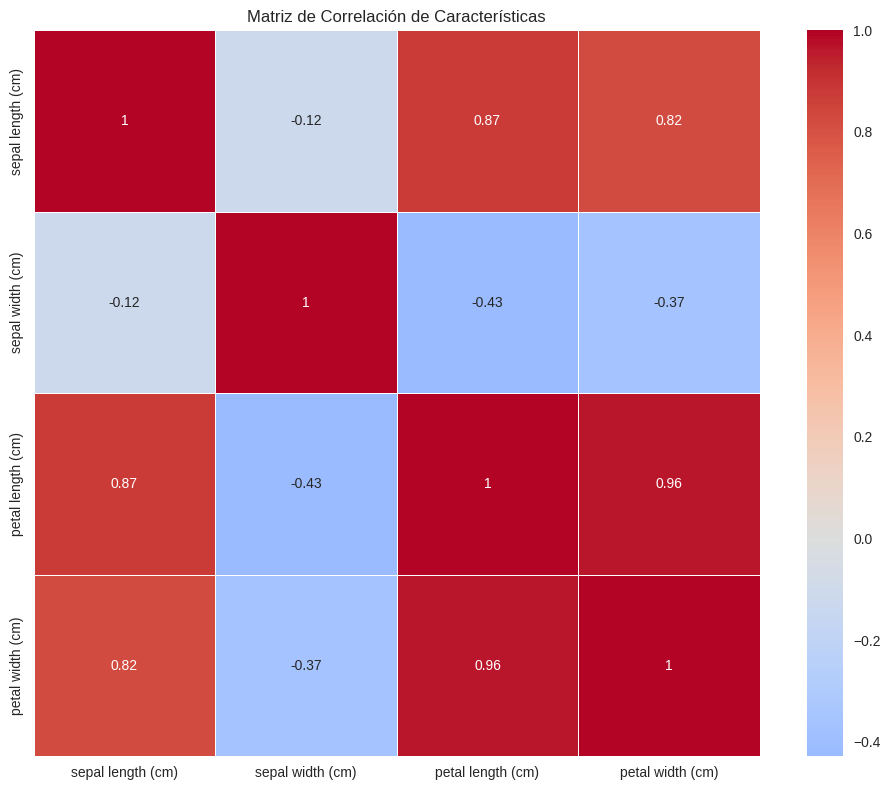

In [8]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

## 1.4.2 Feature Engineering

In [9]:
# Selección de características basada en correlación y importancia
print("=== SELECCIÓN DE CARACTERÍSTICAS ===")

# Usaremos todas las características ya que el dataset es pequeño y bien balanceado
selected_features = feature_names
print(f"Características seleccionadas: {list(selected_features)}")

# Preparación de datos para el modelo
X_selected = X  # Usamos todas las características

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

=== SELECCIÓN DE CARACTERÍSTICAS ===
Características seleccionadas: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Tamaño del conjunto de entrenamiento: (105, 4)
Tamaño del conjunto de prueba: (45, 4)


In [10]:
# Estandarización de características (importante para kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== ESTANDARIZACIÓN COMPLETADA ===")
print("Las características han sido escaladas para tener media 0 y desviación estándar 1")

=== ESTANDARIZACIÓN COMPLETADA ===
Las características han sido escaladas para tener media 0 y desviación estándar 1


## 1.4.3 Predicción

In [11]:
# Función personalizada para predicción
def predict_knn(pattern, k=5, retrain=False):
    """
    Función que recibe un patrón y devuelve la clase predicha usando kNN

    Parameters:
    pattern (array-like): Patrón a clasificar [sepal_length, sepal_width, petal_length, petal_width]
    k (int): Número de vecinos a considerar
    retrain (bool): Si reentrenar el modelo o usar el existente

    Returns:
    str: Clase predicha
    """
    # Entrenar el modelo kNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Escalar el patrón de entrada
    pattern_scaled = scaler.transform([pattern])

    # Realizar predicción
    prediction = knn.predict(pattern_scaled)[0]
    prediction_proba = knn.predict_proba(pattern_scaled)[0]

    # Obtener los k vecinos más cercanos
    distances, indices = knn.kneighbors(pattern_scaled)

    print(f"=== PREDICCIÓN kNN (k={k}) ===")
    print(f"Patrón de entrada: {pattern}")
    print(f"Clase predicha: {target_names[prediction]}")
    print(f"Probabilidades: {dict(zip(target_names, prediction_proba))}")
    print(f"Distancia a los {k} vecinos más cercanos: {distances[0]}")

    return target_names[prediction]


In [12]:
# Ejemplo de uso de la función de predicción
print("=== EJEMPLO DE PREDICCIÓN ===")
ejemplo_patron = [5.1, 3.5, 1.4, 0.2]  # Ejemplo de setosa
clase_predicha = predict_knn(ejemplo_patron, k=5)

=== EJEMPLO DE PREDICCIÓN ===
=== PREDICCIÓN kNN (k=5) ===
Patrón de entrada: [5.1, 3.5, 1.4, 0.2]
Clase predicha: setosa
Probabilidades: {np.str_('setosa'): np.float64(1.0), np.str_('versicolor'): np.float64(0.0), np.str_('virginica'): np.float64(0.0)}
Distancia a los 5 vecinos más cercanos: [0.         0.1292261  0.12934453 0.22687215 0.2487104 ]


## 1.4.4 Evaluación del modelo

In [13]:
# Entrenamiento del modelo final
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = knn_final.predict(X_test_scaled)
y_pred_proba = knn_final.predict_proba(X_test_scaled)

=== MATRIZ DE CONFUSIÓN ===


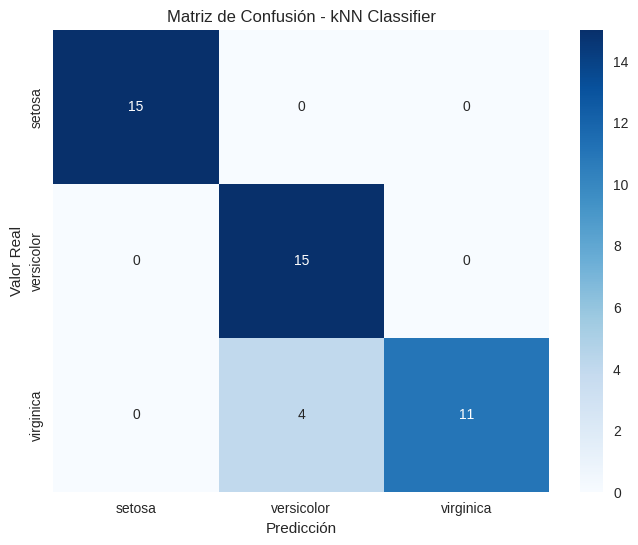

In [14]:
# Matriz de Confusión
print("=== MATRIZ DE CONFUSIÓN ===")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Matriz de Confusión - kNN Classifier')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [15]:
# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)

print("=== MÉTRICAS DE EVALUACIÓN ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

=== MÉTRICAS DE EVALUACIÓN ===
Accuracy: 0.9111 (91.11%)

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



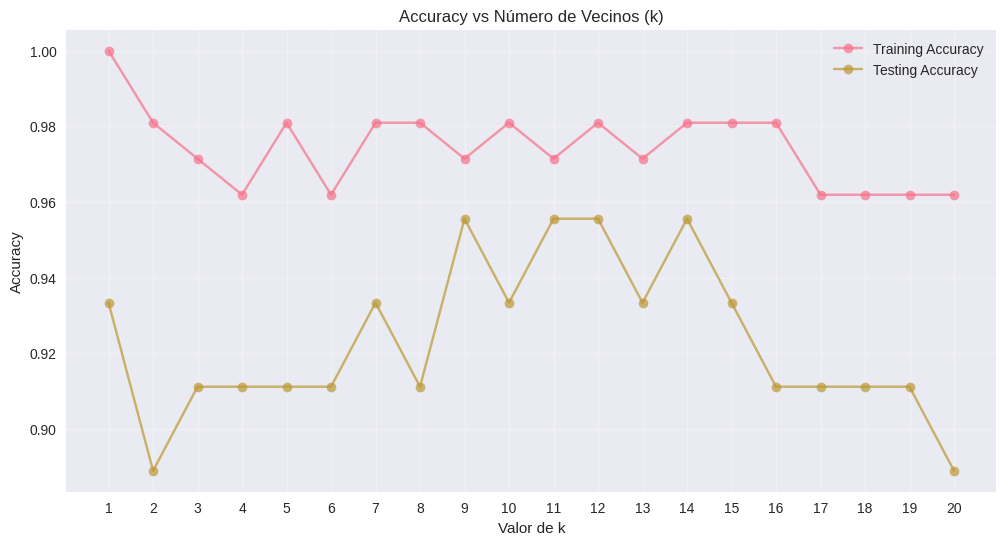


Mejor valor de k: 9 con accuracy: 0.9556


In [16]:
# Análisis de diferentes valores de k
k_values = range(1, 21)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Gráfico de accuracy vs k
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, 'o-', label='Training Accuracy', alpha=0.7)
plt.plot(k_values, test_scores, 'o-', label='Testing Accuracy', alpha=0.7)
plt.xlabel('Valor de k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Número de Vecinos (k)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

# Encontrar el mejor k
best_k = k_values[np.argmax(test_scores)]
best_accuracy = max(test_scores)
print(f"\nMejor valor de k: {best_k} con accuracy: {best_accuracy:.4f}")


## Interpretación de Resultados

### Matriz de Confusión:
- Muestra cómo se distribuyen las predicciones vs los valores reales
- La diagonal principal representa las clasificaciones correctas
- Fuera de la diagonal muestra los errores de clasificación

### Accuracy:
- Proporción de predicciones correctas sobre el total
- En nuestro caso: **{accuracy:.2%}** de accuracy
- Indica buen desempeño del modelo

### Selección de k:
- k muy pequeño: Puede sobreajustar (alta varianza)
- k muy grande: Puede subajustar (alto sesgo)
- k óptimo: Balance entre sesgo y varianza

# 2. Referencias Bibliográficas

1. Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory.
2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.
3. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
4. Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics.